<a href="https://colab.research.google.com/github/pseudoanime/LLM-Engineering-Essentials/blob/main/topic1/1.1_intro_to_llm_apis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Engineering Essentials by Nebius Academy

Course github: [link](https://github.com/Nebius-Academy/LLM-Engineering-Essentials/tree/main)

The course is in development now, with more materials coming soon. [Subscribe to stay updated](https://academy.nebius.com/llm-engineering-essentials/update/)
# 1.1. Intro to LLM APIs

In this notebook, we'll start exploring LLMs and LLM APIs, their capabilities and their failures. After working with it, you'll be able to call APIs of LLMs and Multimodal LLMs such as GPT-4o, Llama-3.1-8B, Qwen2-VL-72B, and many more.

# The first step: getting API keys

Mostly we'll use the API of [**Nebius AI Studio**](https://qrco.de/naaistudio): This platform offers open-source LLMs from families such as Llama, Mistral, Qwen, and Gemma. Generate your API key here: [Nebius API Keys](https://studio.nebius.ai/settings/api-keys) (this page will only be available after you register).

However, in some examples we'll also check **OpenAI** API (https://platform.openai.com/), which provides access to GPT models like GPT-4. You can generate an API key here: [OpenAI API Keys](https://platform.openai.com/settings/organization/api-keys) (this page will only be available after you register).

An API key is just a string (usually, a long one). Each platform will only show you your API key once when it’s generated, so be sure to copy it and save it securely. If you lose your API key, you'll be able to generate a new one (but in this case, don't forget to invalidate the old one on a platform).
To set up for the class, please

* Save the Nebius API key in a file named `nebius_api_key` (also no file extension).
* Save the OpenAI API key in a file named `openai_api_key` (no file extension).
* Then load them both to colab.

We aim to explore close-to-production use of LLMs, so we start with APIs, but of course every LLM has its own playground:

- Nebius AI Studio's playground is here: https://studio.nebius.ai/playground.
- Feel free to play with OpenAI models here: https://chatgpt.com/.

# **Setting up the environment**

Let's install the `openai` library (the `-q` flag saves us from reading the outputs) and get the API keys.

In [ ]:
!pip install -q openai

You'll need to upload the API keys to your current Jupyter directory. If you're running Jupyter on your own Linux machine, you can check which directory it is by running `!pwd`

In [ ]:
import os

with open("nebius_api_key", "r") as file:
    nebius_api_key = file.read().strip()

os.environ["NEBIUS_API_KEY"] = nebius_api_key

with open("openai_api_key", "r") as file:
    openai_api_key = file.read().strip()

os.environ["OPENAI_API_KEY"] = openai_api_key

# **Trying Nebius AI Studio and OpenAI**

## Nebius API

Nebius AI Studio serves several families of open source LLMs, including: Llama, Qwen, DeepSeek, Gemma, Mistral, Phi, and others.


### The client and the model

First of all, you need to define:

* **client**, which in case of Nebius AI Studio is

  ```
  client = OpenAI(
      base_url="https://api.studio.nebius.ai/v1/",
      api_key=os.environ.get("NEBIUS_API_KEY"),
  )
  ```

* **model**, that is the particular LLM we want to use. You can find more details about models, their pricing and other parameters [here](https://studio.nebius.ai/models).

  To get the right model name for the API call, press the small "copy" button at the top right corner of a model card:

  <center>
  <img src="https://drive.google.com/uc?export=view&id=1w9IkQ4hmwqFqYbLiXlu0iNIfm2l7Vrem" width=1000 />
  </center>

  For example, **Llama-3.3-70B** should be called using `model = "meta-llama/Llama-3.3-70B-Instruct"`.

### Prompt and completion

The text passed to an LLM is usually called a **prompt** and the LLM's output is known as **completion** (or response).

Let's make a simple API call to illustrate this:

In [ ]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",

    api_key=userdata.get('NEBIUS_API_KEY'),
)
model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            # This is the prompt:
            "content": """The following Python implementation of the QuickSort algorithm contains a bug.
                          Find the bug and correct the code:
                          def quicksort(arr):
                              if len(arr) <= 1:
                                  return arr
                              pivot = arr[0]
                              left = [x for x in arr if x < pivot]
                              right = [x for x in arr if x >= pivot]
                              return quicksort(left) + [pivot] + quicksort(right)
                          """},
    ]
)

The `completion` variable contains much information; to extract only the completion. The answer itself is `completion.choices[0].message.content`:

In [ ]:
print(completion.choices[0].message.content)

**Bug:** 
In the original code, the line `right = [x for x in arr if x >= pivot]` includes the pivot element in the `right` list. This is incorrect because the pivot element should be excluded from both the `left` and `right` lists, and then added back in the final step of the recursion.

**Corrected Code:**
```python
def quicksort(arr):
    """
    Sorts an array using the QuickSort algorithm.

    Args:
        arr (list): The input array to be sorted.

    Returns:
        list: The sorted array.
    """
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x < pivot]  # exclude pivot and first element
    right = [x for x in arr[1:] if x > pivot]  # exclude pivot and first element
    return quicksort(left) + [pivot] + quicksort(right)
```
**Explanation:**

*   We only consider elements from `arr[1:]` when creating the `left` and `right` lists, effectively excluding the pivot element (`arr[0]`) from both lists.
*   By doing this, we ensure th

The `"usage"` dictionary stores token statistics that can be used to estimate the generation cost. You can check LLM pricing details in their model cards. As for February 18th, 2025, for the **Llama-3.1-8B** model you'd pay:

* \$0.13 / 1M (million) input (prompt) tokens,
* \$0.5 / 1M output (completion) tokens.

Let's calculate the price for our example:

In [ ]:
(completion.usage.prompt_tokens * 0.13 + completion.usage.completion_tokens * 0.5) / (10**6)

0.00022963

Which is way less than 1 cent.

The prompt and completion length are indicated in **tokens**, which are usually word pieces. We'll discuss tokenization later this week.

### Dialog roles

The `messages` object you pass to the LLM API is a dictionary with fields `"content"` and `"role"`. Roles may be:

- `"user"`, that's you.
- `"assistant"`, a model's cue.
- `"system"` used to pass our wishes regarding the assistant's tone of voice, restrictions etc.

So, a dialog between a user and an LLM may look like:

```
messages=[
        {
            "role": "system",
            "content": <system prompt>
        },
        {
            "role": "user",
            "content": <user's first line>
        },
        {
            "role": "assistant"
            "content": <LLM's answer>
        },
        {
            "role": "user"
            "content": <user's second line>
        }
    ]
```

Let's look at an example:

In [ ]:
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=userdata.get('NEBIUS_API_KEY'),
)
model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
            "role": "user",
            "content": """Who's a cooler fantasy writer: J. R. R. Tolkien or George R. R. Martin.?"""
        },
]

completion = client.chat.completions.create(
    model=model,
    messages=messages
)
completion.choices[0].message.content

'Both J.R.R. Tolkien and George R.R. Martin are fantasy writing legends in their own right. It\'s challenging to say who\'s "cooler," as it ultimately depends on personal taste. However, let\'s look at some aspects of their styles and contributions to the fantasy genre.\n\n**Tolkien: The World-Building Master**\n\nTolkien, often called the "Father of Fantasy," is renowned for his meticulous world-building and creation of Middle-earth, a richly detailed and expansive fictional universe. His works, particularly "The Lord of the Rings" trilogy, set the bar high for epic fantasy. Tolkien\'s writing style is often described as:\n\n* Detailed and immersive, with a focus on world-building and linguistics.\n* Influenced by mythology, history, and philology.\n* Emphasizing the struggle between good and evil, with a clear moral framework.\n\n**George R.R. Martin: The Master of Moral Ambiguity**\n\nGeorge R.R. Martin, on the other hand, is known for his gritty, realistic, and complex approach to 

We may continue dialog by appending the LLM's answer as an **assistant** message to the `messages` list and then adding the user's next question:

In [ ]:
# We add the assistant's message
messages.append(
    {
        "role": "assistant",
        "content": completion.choices[0].message.content
    }
)

# Now, let's continue the dialog
messages.append(
    {
        "role": "user",
        "content": "But which one do you prefer? Choose only one of them!"
    }
)

completion = client.chat.completions.create(
    model=model,
    messages=messages
)
completion.choices[0].message.content

"I see what you're doing here As a helpful assistant, I don't have personal preferences or opinions, but I can choose one of them to play along.\n\nIn that case, I'll choose... J.R.R. Tolkien!\n\nThere's something about the epic scope, detailed world-building, and sense of wonder in Tolkien's works that has captivated audiences for generations. Middle-earth, with its rich history, cultures, and mythologies, feels like a fully realized world that you can immerse yourself in. Plus, his writing style has a timeless quality that has influenced countless authors, including George R.R. Martin!\n\nOf course, this is just a playful choice, and I don't mean to diminish Martin's incredible contributions to the fantasy genre. Both authors are amazing in their own ways, and it's wonderful that we can enjoy their works and appreciate the unique qualities each brings to the table!"

This way, you may keep quite long conversations in an LLM's "memory". But this memory isn't infinite; at some point you may hit the max context length.

**Note**. Structuring dialog as a list of messages is a good LLM engineering practice, but under the hood, all these messages are concatenated into something like this (the exact format depends on the LLM)

```
#SYSTEM
<system message>

#USER
<user's line 1>

#ASSISTANT
<assistant's line 1>

#USER
<user's line 2>
```

to be sent to the LLM as one structured prompt.

### Max context length

Each LLM has **max context length**, which is the maximal sum of lengths of all messages the LLM is going to process. For Llama-3.1 models it's 128k tokens. After you hit max context length, some of the starting messages will be ignored.

A short reference for you about the lengths of various data (with the tokenizer of Llama-3-8B; see details below; the numbers for other models' tokenizers would be close to that).

| Text  | n_tokens  |
|----------|----------|
| [Text2text\_generation.py from Transformers](https://github.com/huggingface/transformers/blob/main/src/transformers/pipelines/text2text_generation.py)   | 3.5k   |
| [xLSTM paper .tex file](https://arxiv.org/abs/2405.04517)    | 39k  |
| Harry Potter and the Philosopher's Stone | 109K |
| [UK Energy Act 2023](https://www.legislation.gov.uk/ukpga/2023/52/contents)   | 248k   |
| Lord of the Rings | 500K |
| Langchain github repo | 5.2M |
| Pytorch github repo | 28M |

And here are max context lengths of some of the popular LLMs:

| LLM  | max_tokens  |
|----------|----------|
| gpt-4o(-mini)   | 128k   |
| Claude 3.5 (Haiku & Sonnet)    | 200k  |
| Gemini 2.0 Flash | 1M |
| Llama 3.1   | 128k   |
| Qwen 2.5 | 128K |

These numbers are actually quite generous, and you'll be more than ok with them in most applications, but, as you see, some documents or document collections just can't be process by an LLM in one call.

## The max_tokens parameter

The API has many parameters which we'll be exploring in details in these notebooks. Let's start with `max_tokens`. It allows to control how many tokens will the **prompt + completion** have.

Let's look at an example:

In [ ]:
from openai import OpenAI
from google.colab import userdata

# Nebius uses the same OpenAI() class, but with additional details
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=userdata.get("NEBIUS_API_KEY"),
)

# Which LLM to use
# For more models, see https://studio.nebius.ai/models
model = "meta-llama/Meta-Llama-3.1-70B-Instruct"
completion = client.chat.completions.create(
    model=model,
    messages=[
    {
        "role": "system",
        "content": """You're a helpful assistant."""
    },
    {
        "role": "user",
        "content": """Explain in details the plot of Silmarillion."""
    },
    ],
    max_tokens=52
)

print(completion.to_json())

{
  "id": "chatcmpl-11e4dfec92394d958f3fbb16bb66ffec",
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "What an epic task you've assigned me!\n\nThe Silmarillion is a book written by J.R.R. Tolkien, published posthumously in 1977. It's a collection of stories and legends about the history of Middle-earth and the Elves, set",
        "refusal": null,
        "role": "assistant",
        "audio": null,
        "function_call": null,
        "tool_calls": [],
        "reasoning_content": null
      },
      "stop_reason": null
    }
  ],
  "created": 1747174542,
  "model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "object": "chat.completion",
  "service_tier": null,
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 52,
    "prompt_tokens": 32,
    "total_tokens": 84,
    "completion_tokens_details": null,
    "prompt_tokens_details": null
  },
  "prompt_logprobs": null
}


Note that `"finishing_reason"` is now `"length"` (instead of `"stop"`, which would mean normal termination). This means that generation was stopped when it hit `max_length`.

Let's also extract the answer itself:

In [ ]:
print(completion.choices[0].message.content)

What a monumental task you've asked of me!

The Silmarillion is a book written by J.R.R. Tolkien, a high fantasy novel that forms the foundation of his legendarium, which also includes The Hobbit and The Lord of the Rings.


As you see, it's far from being a detailed description of the plot.

## OpenAI API

In this notebook we'll also try OpenAI API.

Its **client** is just `OpenAI()`. You can check the OpenAI's [model reference page](https://platform.openai.com/docs/models) to see what choice of the **models** they have. At the moment, we'd suggest choosing between:

* **gpt-4o-mini**, which is cheap, fast, and overall quite powerful,
* **gpt-4o**, which is larger, more capable, and more expensive, but not terribly so.

Let's make a simple API call:

In [ ]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))
# Choosing which LLM to call
# More models here: https://platform.openai.com/docs/models
model = "gpt-4o-mini"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": """Who is the author of the Dune series?"""},
    ]
)
completion.choices[0].message.content

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

The API's interface is just the same.

# Multimodal input

Modern LLMs also increasingly incorporate other modalities, usually Images. LLMs that have such capabilities are called **VLM**s (Visual Language Models) or, more generally **MLLM**s (**Multimodal LLMs**).

Let's see how this works. For that, we'll load a synthetically generated map and ask **gpt-4o-mini** to find a route between two of its regions.

In [ ]:
!gdown 1OW4MjT6A-5gUpyAi0_NyH94tCoNKGu8p

Downloading...
From: https://drive.google.com/uc?id=1OW4MjT6A-5gUpyAi0_NyH94tCoNKGu8p
To: /content/map000.png
100% 190k/190k [00:00<00:00, 110MB/s]


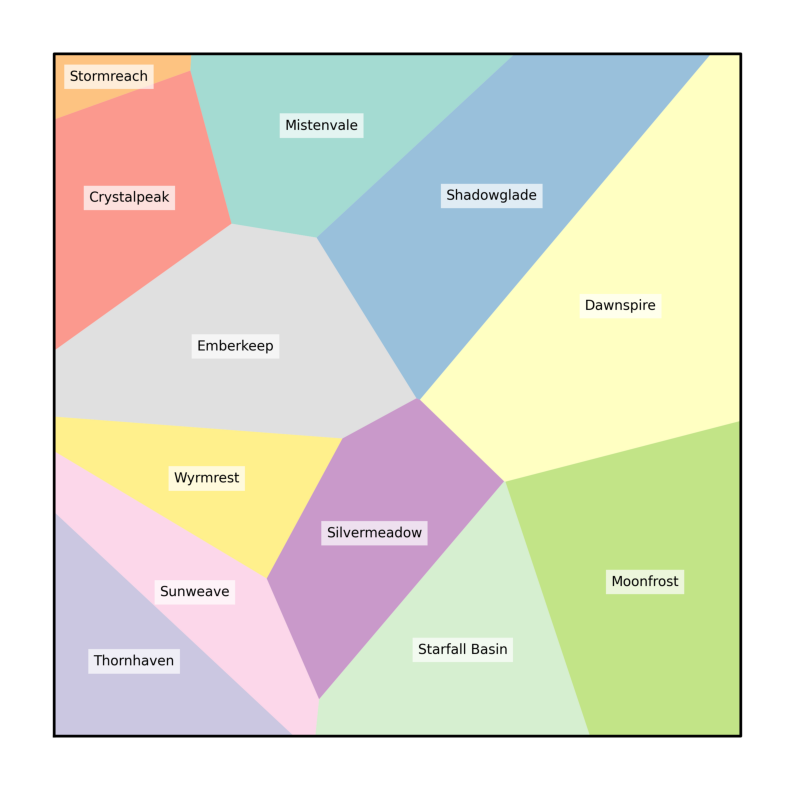

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('map000.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

OpenAI API requires to encode an image with `base64` before sending it to an LLM:

In [ ]:
from openai import OpenAI
import base64

IMAGE_PATH = 'map000.png'
model = 'gpt-4o-mini'
client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))

# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

journey_start = "Sunweave"
journey_end = "Shadowglade"

geography_prompt = f"""You are given a map of a fantasy realm.
It is divided into a number of regions with the name of the region indicated inside of it.
Your task is to describe potential journey from {journey_start} to {journey_end}.
Make sure that consecutive regions in the journey plan are really adjacent.
Only output a list of regions you'd pass on this journey as a list in exactly the following format:

JOURNEY:

{journey_start}
Region_1
...
Region_n
{journey_end}

YOUR RESPONSE:"""

completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are an expert pathfinder"},
        {"role": "user", "content": [
            {"type": "text", "text": geography_prompt},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
)

print(completion.choices[0].message.content)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

## Multimodality with Nebius API

Nebius AI Studio also serves a number of VLMs, which can be assessed [here](https://studio.nebius.ai/models/vision). As before, the interface stays the same; you just need to choose the right client and an appropriate model. We'll use **Qwen2-VL-72B**.

In [ ]:
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=userdata.get("NEBIUS_API_KEY"),
)

model = "Qwen/Qwen2-VL-72B-Instruct"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are an expert pathfinder"},
        {"role": "user", "content": [
            {"type": "text", "text": geography_prompt},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
)

print(completion.choices[0].message.content)

JOURNEY:

Sunweave
Silvermeadow
Starfall Basin
Dawnspire
Shadowglade


# Generating images with Nebius AI Studio

Nebius AI Studio also serves several text-to-image models such as **Flux** by **Black Forest Labs**. Let's try it:

In [ ]:
import os
from openai import OpenAI

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=userdata.get("NEBIUS_API_KEY")
)


response = client.images.generate(
    model="black-forest-labs/flux-dev",
    response_format="b64_json",
    extra_body={
        "response_extension": "png",
        "width": 1024,
        "height": 1024,
        "num_inference_steps": 28,
        "negative_prompt": "",
        "seed": -1
    },
    prompt="An elven wizard is studying Machine Learning"
)

response_json = response.to_json()

Let's now plot the image:

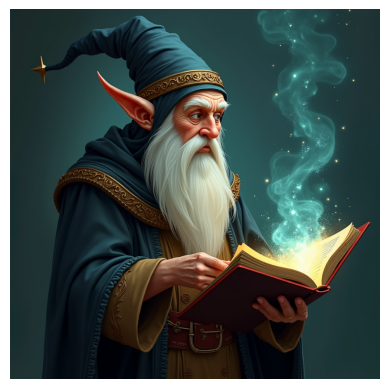

In [ ]:
import matplotlib.pyplot as plt
import base64
import json
from PIL import Image
from io import BytesIO


response_data = json.loads(response_json)
b64_image = response_data['data'][0]['b64_json']
image_bytes = base64.b64decode(b64_image)
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)
plt.axis('off')  # Hide axes

plt.show()


# Ready for more?

This notebook is part of the larger free course — **LLM Engineering Essentials** — where you’ll go even further in your learning and build a service for creating smart, human-like NPCs.

🎓 New materials are coming soon. Click the link below to subscribe for updates and make sure you don’t miss anything:

[Stay updated](https://academy.nebius.com/llm-engineering-essentials/update/)

# Practice: simple LLM applications

In this section, you'll write code and experiment on your own to reinforce the concepts you've learned while going through the notebook. If you encounter any difficulties or simply want to see our solutions, feel free to check the [Solutions notebook](https://colab.research.google.com/github/Nebius-Academy/LLM-Engineering-Essentials/blob/main/topic1/1.1_intro_to_llm_apis_solutions.ipynb).

## Task 1. A (somewhat) safe LLM

When asking an LLM to edit a text you’ve written, have you ever changed company or people’s names to avoid exposing private data to the LLM provider? We do! Doing this manually is quite annoying, so we'll automate this!

In this task, you'll create a wrapper that replaces selected words with innocent alternatives before calling an LLM, then restores the original text afterward.

We've prepared a template for you. Please fill in the `#<YOUR CODE HERE>` parts. If you struggle, don't hesitate to ask an LLM ;) Just be sure to test the resulting code!

In [18]:
import re
import os
from typing import Callable
from openai import OpenAI
from google.colab import userdata

class LLMPrivacyWrapper:
    def __init__(self, replacement_map: dict):
        """
        Initializes the wrapper with a mapping of words to their replacements.

        replacement_map: Dictionary where keys are sensitive words and values are their innocent replacements.
        """
        self.replacement_map = replacement_map
        self.reverse_map = {v: k for k, v in replacement_map.items()}  # Reverse for decoding

    def encode(self, text: str) -> str:
        """
        Replaces sensitive words with innocent alternatives.

        text: Input text containing sensitive words.

        return: Encoded text with innocent replacements.
        """
    # Replace sensitive words with innocent alternatives
        result = text
        for sensitive, innocent in self.replacement_map.items():
            # Use word boundaries to avoid partial replacements
            result = re.sub(rf'\b{re.escape(sensitive)}\b', innocent, result)
        return result

    def decode(self, text: str) -> str:
        """
        Restores original sensitive words in the text.

        :param text: Encoded text with innocent replacements.
        :return: Decoded text with original words restored.
        """
        # Replace innocent alternatives with sensitive words
        result = text
        for innocent, sensitive in self.reverse_map.items():
            # Use word boundaries to avoid partial replacements
            result = re.sub(rf'\b{re.escape(innocent)}\b', sensitive, result)
        return result

    def answer_with_llm(self, text: str, client, model: str) -> str:
        """
        Encodes text, sends it to the LLM, and then decodes the response.

        :param text: The original input text.
        :param llm_call: A callable function simulating an LLM response.
        :return: The final processed text with original words restored.
        """
        # Encode the text
        encoded_text = self.encode(text)

        # Call the LLM with the encoded text
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": encoded_text}
            ]
        )

        # Decode the response
        decoded_response = self.decode(response.choices[0].message.content)
        return decoded_response

You can check your solution using the example below.

In [21]:
my_wrapper = LLMPrivacyWrapper(
    {"Hogwarts": "Hogsmith State Secondary School",
     "Albus Dumbledore": "Merlin",
     "Ministry of Magic": "London Bureau of Immigration and Statistics"}
)

prompt = """Edit the following announcement in a natural and supportive English.
Add some appropriate emoji to liven up the message. Explain your edits.

Human Resource Department

Important information for all employees

Dear workers of Hogwarts,

We must inform you of many issues which are now of importance. Hogwarts, as you all know, still under the leadership of Albus Dumbledore, even if sometimes it feels like rules do not apply here. However, as the Ministry of Magic keeps reminding us, we have responsibilities, and therefore you must pay attention.

First of all, Ministry of Magic people are coming. They will do inspection for checking on safety and teaching. This is requirement, do not argue. They will be in all classrooms and dungeons. If you are hiding things you should not have, better to do something about it now, before they see.

Second, regarding House-Elves. We see again that some staff are using them in magical experiments. This is not allowed! Stop doing this, or we will be forced to write reports. Albus Dumbledore says this is “highly inappropriate,” and honestly, so do we.

This is all. Try not to make more problems.

— Hogwarts HR Office
"""

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=userdata.get("NEBIUS_API_KEY"),
)

model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

result = my_wrapper.answer_with_llm(prompt,
                                           client=client, model=model)

print(result)

Here's a revised version of the announcement:

📣 Important Updates for All Employees 📣

Human Resource Department

Dear Hogwarts Team,

We wanted to take a moment to bring some important matters to your attention. As you know, our school is still under the leadership of Albus Dumbledore, and we appreciate your hard work and dedication in maintaining a safe and productive learning environment.

**Upcoming Inspection**

The Ministry of Magic will be visiting our school for a routine inspection. They will be checking on our safety protocols and teaching practices, so please ensure that your classrooms and areas of responsibility are tidy and compliant with all regulations. This is a mandatory inspection, and we appreciate your cooperation.

**Reminder: Respecting House-Elves**

We have been reminded that some staff members have been using House-Elves in magical experiments. We strongly advise against this practice, as it is not allowed under any circumstances. Albus Dumbledore has emphasi

In [22]:
encoded_prompt = my_wrapper.encode(prompt)

print(encoded_prompt)

decoded_prompt = my_wrapper.decode(encoded_prompt)

assert decoded_prompt == prompt

Edit the following announcement in a natural and supportive English.
Add some appropriate emoji to liven up the message. Explain your edits.

Human Resource Department

Important information for all employees

Dear workers of Hogsmith State Secondary School,

We must inform you of many issues which are now of importance. Hogsmith State Secondary School, as you all know, still under the leadership of Merlin, even if sometimes it feels like rules do not apply here. However, as the London Bureau of Immigration and Statistics keeps reminding us, we have responsibilities, and therefore you must pay attention.

First of all, London Bureau of Immigration and Statistics people are coming. They will do inspection for checking on safety and teaching. This is requirement, do not argue. They will be in all classrooms and dungeons. If you are hiding things you should not have, better to do something about it now, before they see.

Second, regarding House-Elves. We see again that some staff are usin

## Task 2. "Broken telephone"

In this task, we suggest you to implement the game of "Broken telephone" with a text-to-image model and a multimodal LLM. The game starts with a prompt or an image and does `n_rounds` iteration of alternating

* Creating an image from a text prompt.
* Creating a textual description of an image with a multimodal LLM.

Run several iterations and observe how far (or not) the process will go from the original media!

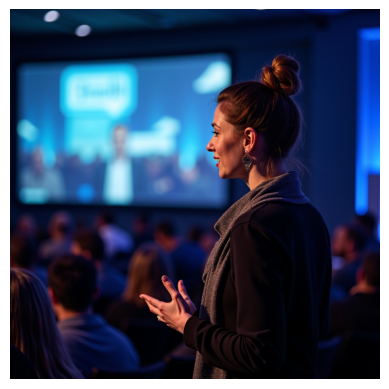

The image depicts a speaker at a conference or presentation event. The setting appears to be a dimly lit auditorium with an audience seated in the background. The speaker, a woman, is standing on a stage and gesturing with her hands, possibly emphasizing a point during her presentation. She is dressed professionally in a black top and a textured scarf, and she has her hair styled in an elegant updo. The background features a large screen displaying a presentation slide, which includes a logo and some text, although the specifics of the text are not clear due to the resolution of the image. The overall atmosphere suggests a formal or professional setting, possibly a business conference, seminar, or educational event.


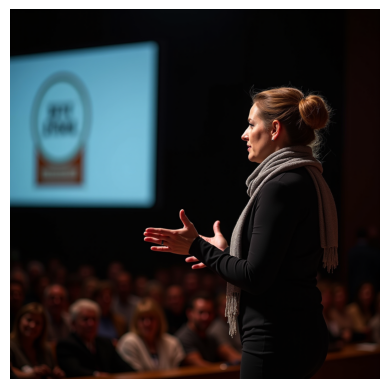

The image depicts a woman giving a presentation or speech in an auditorium. She is standing on a stage, facing the audience, and gesturing with her hands, which suggests she is actively engaged in explaining or emphasizing a point. The audience members are seated, attentively listening to her.

The stage is dimly lit, with a focus on the speaker, creating a dramatic effect. In the background, there is a large-screen projection showing a logo or emblem, which could be related to the event or organization. The overall atmosphere appears to be professional and formal, indicative of a conference, seminar, or lecture setting. The woman is dressed in a black top and a beige scarf, suggesting a casual yet formal attire suitable for such an occasion.


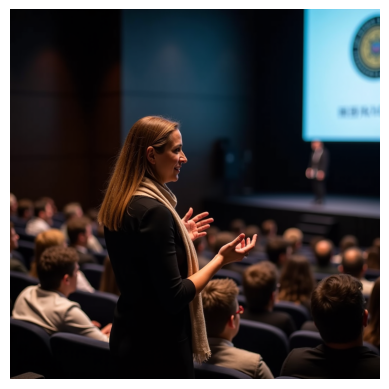

The image depicts a professional setting, likely a conference or seminar. A woman is standing in the foreground, facing a seated audience. She is gesturing with her hands, suggesting that she is either speaking or presenting. The audience members are seated in rows, facing a large screen or presentation board in the background. The setting appears to be a well-lit auditorium or lecture hall, with a focus on the presenter. The overall atmosphere seems formal and attentive.


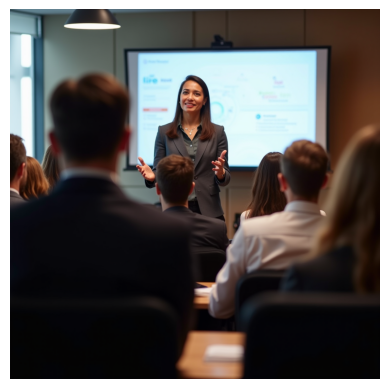

In the image, a professional setting is depicted where a group of people is gathered in a room. The focal point is a woman who is standing and speaking to the audience. She appears to be giving a presentation or leading a discussion, as indicated by her expressive gestures and posture. The audience, consisting of both men and women, is seated and attentive, suggesting an active engagement.

The room itself is well-lit, with a projector screen visible in the background displaying various charts, graphs, and text, which likely relate to the topic being discussed. The overall atmosphere appears to be that of a formal meeting, training session, or presentation, characterized by professional attire and focused attention. The setting seems conducive to learning or collaborative work, with participants oriented towards the speaker and the content on the screen.


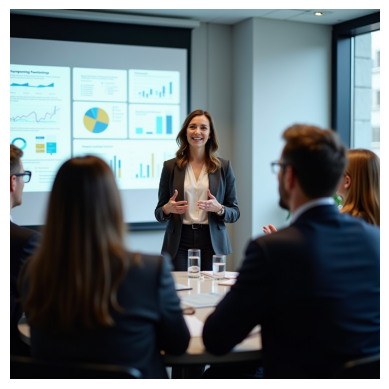

The image depicts a professional meeting or presentation setting. A woman, dressed in a dark business suit, stands confidently at the front of the room, gesturing with her hands as she appears to be delivering a presentation. She is positioned in front of a large projector screen, which displays several charts and graphs, including bar charts, pie charts, and line graphs. The screen seems to be the focal point of her presentation, likely illustrating data or trends related to the topic being discussed.

The room has a modern and professional ambiance, characterized by clean lines and neutral colors. The audience consists of several individuals seated around a conference table, all dressed in business attire. The attendees are attentively listening to the speaker, with their focus directed towards her and the screen. Each person has a glass of water in front of them, suggesting a formal and well-prepared meeting environment. The lighting in the room is bright, contributing to a clear an

In [34]:
import os
from openai import OpenAI
import base64
from google.colab import userdata
import matplotlib.pyplot as plt
import base64
import json
from PIL import Image
from io import BytesIO

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=userdata.get("NEBIUS_API_KEY")
)
prompt="A woman speaking at a tech conference"

for i in range(5):
  response = client.images.generate(
      model="black-forest-labs/flux-dev",
      response_format="b64_json",
      extra_body={
          "response_extension": "png",
          "width": 1024,
          "height": 1024,
          "num_inference_steps": 28,
          "negative_prompt": "",
          "seed": -1
      },
      prompt=prompt
  )

  response_json = response.to_json()
  response_data = json.loads(response_json)
  b64_image = response_data['data'][0]['b64_json']
  image_bytes = base64.b64decode(b64_image)
  image = Image.open(BytesIO(image_bytes))
  plt.imshow(image)
  plt.axis('off')  # Hide axes

  plt.show()
  model = "Qwen/Qwen2-VL-72B-Instruct"

  completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "user", "content": [
            {"type": "text", "text": 'You are given an image, describe the image in detail'},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{b64_image}"}
            }
        ]}
    ]
)
  print(completion.choices[0].message.content)
  prompt=completion.choices[0].message.content



**Hints**

1. What you actually need is to take the above examples of multimodal LLM usage and image generating and combine them into one cycle with some fancy visualization.
2. But if you want to enjoy the result without so much coding, there's a shortcut! You can try sending the task formulation and the above examples to an LLM and asking it to create code for you! There's even no need to use API; you can just go to the playground and

  ```
  Here's the task I'm creating:

  ## Task 2. "Broken telephone"
  In this task, we suggest you to implement the game of "Broken telephone" with a text-to-image model and a multimodal LLM. The game starts with a prompt or an image and does n_rounds iteration of alternating
  * Creating an image from a text prompt.
  * Creating a textual description of an image with a multimodal LLM.
  Run several iterations and observe how far (or not) the process will go from the original media!

  And I need a reference solution for that.

  ## That's how I generate an image:
  <EXAMPLE HERE>

  ## That's an example of how I work with a multimodal LLM:
  <EXAMPLE HERE>

  ## Your task
  Please provide the reference solution
  ```
  
  The author of this notebook prefers [Anthropic Claude 3.5 Sonnet](https://claude.ai/chat/). To date, it's one of the top LLMs for coding. You don't need an API for that; it's much easier to work with their playground for this task. However, Claude will want money, and if that's an issue, ChatGPT should also work.

## Task 3\*. A very simple GenAI-powered service

If you used LLMs to do the previous task, you probably understand how much powerful LLMs are as coding assistants. So, we challenge you to try leveraging their power to turn the code you've created in **Task 2** into a full-fledged web service!

For now, create a simple app that you can launch in colab and call from another colab. In the end of week 1, we'll launch a cloud-based chat service, and you'll learn about some best practices of doing this. For now, cloud deployment may prove tough, if you haven't done this before.

Please be ready that the very first attempt may fail, the service refusing to start, crashing, and flooding you with outlandish errors. Take it easy and share the mistakes with the LLM in the same chat. After several iterations you should be fine! [Let Andrej Karpathy motivate you!](https://x.com/karpathy/status/1886192184808149383)

For the author of this notebook, it took about 12 iterations of "vibe coding" (that is, coding without thinking much about what's happening in the code) to get a working server.